In [1]:
#%matplotlib widget
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import pack_vis
import pack_dimer
import pack_vis_sol
import pack_cost
import numpy as np
import cupy as cp
import copy
kgs.set_float32(False)

local
local


[0.]
[2.22239067e-07]
[0.]
SolutionCollectionLattice(comment='', xyt=array([[[-0.07500008,  0.32039896,  0.        ],
        [ 0.07500008, -0.32039896,  3.14159265]]]), h=array([[2.        , 2.        , 1.57079633]]), periodic=True)


<Axes: >

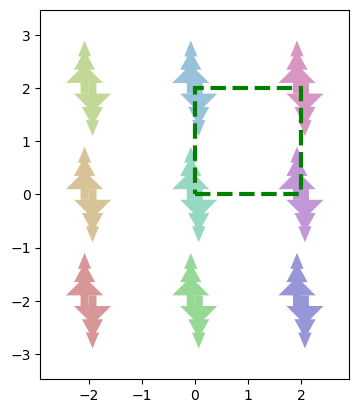

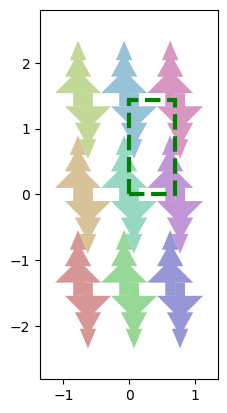

In [2]:
importlib.reload(pack_dimer)
dimer = pack_dimer.create_dimer()
sol = kgs.SolutionCollectionLattice(xyt=dimer[None], h=cp.array([[2.,2.,np.pi/2]], dtype=kgs.dtype_cp))
pack_vis_sol.pack_vis_sol(sol, solution_idx=0)
print(pack_cost.CollisionCostOverlappingArea().compute_cost_allocate(sol)[0].get())
X=0.999999
sol.xyt[0,:,:2]*=X
print(pack_cost.CollisionCostOverlappingArea().compute_cost_allocate(sol)[0].get())
sol.xyt[0,:,:2]/=X
sol.xyt[0,:,:2]/=X
print(pack_cost.CollisionCostOverlappingArea().compute_cost_allocate(sol)[0].get())
print(sol)
pack_dimer.snap_cell(sol, skip_assert=False)
pack_vis_sol.pack_vis_sol(sol, solution_idx=0)

In [3]:
import tqdm
importlib.reload(pack_dimer)
dimer = pack_dimer.create_dimer()
sol_base = kgs.SolutionCollectionLattice(xyt=dimer[None], h=cp.array([[3.,3.,np.pi/2]], dtype=kgs.dtype_cp))
rot_tree_vals = np.arange(0, np.pi/2*1.00001, np.pi/20)
rot_cell_vals = np.arange(np.pi/4, np.pi/2*1.00001, np.pi/20)
res_area = np.zeros((len(rot_tree_vals), len(rot_cell_vals)))
res_aspect_ratio = np.zeros((len(rot_tree_vals), len(rot_cell_vals)))
for i, rot_tree in enumerate(tqdm.tqdm(rot_tree_vals)):
    for j, rot_cell in enumerate(rot_cell_vals):
        try:
            sol = copy.deepcopy(sol_base)
            sol.rotate(rot_tree)
            sol.h[0,2] = rot_cell        
            pack_dimer.snap_cell(sol, skip_assert=False)
            res_area[i,j] = sol.compute_cost_single_ref(sol.h[0])[0].get()
            res_aspect_ratio[i,j] = sol.h[0,0]/(sol.h[0,1]*np.sin(sol.h[0,2]))
        except:
            res_area[i,j] = np.nan
            res_aspect_ratio[i,j] = np.nan
            # sol = copy.deepcopy(sol_base)
            # sol.rotate(rot_tree)
            # sol.h[0,2] = rot_cell        
            # pack_vis_sol.pack_vis_sol(sol, solution_idx=0)        
            # pack_dimer.snap_cell(sol, skip_assert=True)
            # pack_vis_sol.pack_vis_sol(sol, solution_idx=0) 
            # sol = copy.deepcopy(sol_base)
            # sol.rotate(rot_tree)
            # sol.h[0,2] = rot_cell     
            # pack_dimer.snap_cell(sol, skip_assert=False)     
        


100%|██████████| 11/11 [00:03<00:00,  3.53it/s]


In [4]:
np.min(res_area)

np.float64(0.6361103884847129)

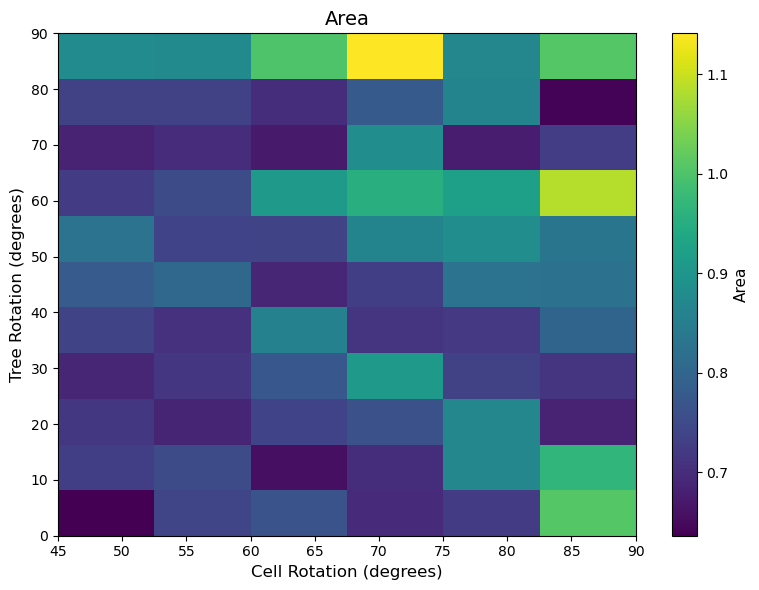

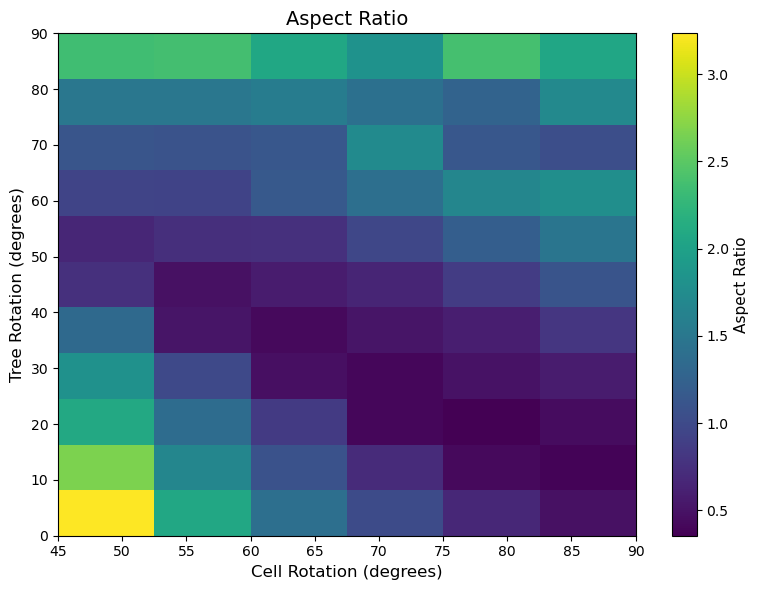

In [5]:
import matplotlib.pyplot as plt

def plot_rotation_heatmap(data, rot_tree_vals, rot_cell_vals, title, cbar_label):
    """Plot a heatmap of rotation analysis results."""
    # Convert radians to degrees for axis labels
    rot_tree_degrees = np.degrees(rot_tree_vals)
    rot_cell_degrees = np.degrees(rot_cell_vals)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(data, origin='lower', aspect='auto', 
                   extent=[rot_cell_degrees[0], rot_cell_degrees[-1], 
                          rot_tree_degrees[0], rot_tree_degrees[-1]])
    ax.set_xlabel('Cell Rotation (degrees)', fontsize=12)
    ax.set_ylabel('Tree Rotation (degrees)', fontsize=12)
    ax.set_title(title, fontsize=14)
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbar_label, fontsize=11)
    
    plt.tight_layout()
    plt.show()

# Create two separate figures
plot_rotation_heatmap(res_area, rot_tree_vals, rot_cell_vals, 
                      'Area', 'Area')
plot_rotation_heatmap(res_aspect_ratio, rot_tree_vals, rot_cell_vals, 
                      'Aspect Ratio', 'Aspect Ratio')

In [6]:
import tqdm
importlib.reload(pack_dimer)
dimer = pack_dimer.create_dimer()
sol_base = kgs.SolutionCollectionLattice(xyt=dimer[None], h=cp.array([[3.,3.,np.pi/2]], dtype=kgs.dtype_cp))
rot_tree_vals = np.arange(0, np.pi/2*1.00001, np.pi/200)
rot_cell_vals = [np.pi/2]
res_area2 = np.zeros((len(rot_tree_vals), len(rot_cell_vals)))
res_aspect_ratio2 = np.zeros((len(rot_tree_vals), len(rot_cell_vals)))
for i, rot_tree in enumerate(tqdm.tqdm(rot_tree_vals)):
    for j, rot_cell in enumerate(rot_cell_vals):
        try:
            sol = copy.deepcopy(sol_base)
            sol.rotate(rot_tree)
            sol.h[0,2] = rot_cell        
            pack_dimer.snap_cell(sol, skip_assert=False)
            res_area2[i,j] = sol.compute_cost_single_ref(sol.h[0])[0].get()
            res_aspect_ratio2[i,j] = sol.h[0,0]/(sol.h[0,1]*np.sin(sol.h[0,2]))
        except:
            res_area2[i,j] = np.nan
            res_aspect_ratio2[i,j] = np.nan 
        


100%|██████████| 101/101 [00:04<00:00, 20.70it/s]


(array([20.7, 23.4, 80.1]), array([0.63632145, 0.65736893, 0.62745664]))

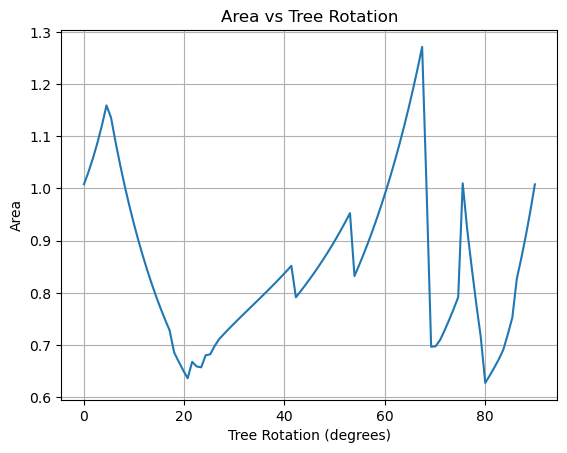

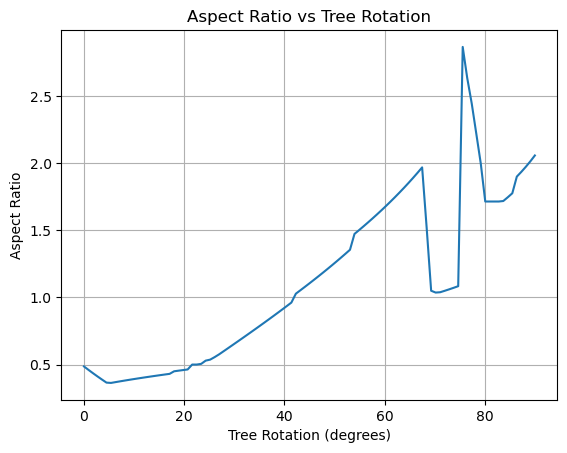

In [7]:
import mplcursors

fig1, ax1 = plt.subplots()
line1 = ax1.plot(np.degrees(rot_tree_vals), res_area2)
ax1.grid(True)
ax1.set_xlabel('Tree Rotation (degrees)')
ax1.set_ylabel('Area')
ax1.set_title('Area vs Tree Rotation')
mplcursors.cursor(line1, hover=True)

fig2, ax2 = plt.subplots()
line2 = ax2.plot(np.degrees(rot_tree_vals), res_aspect_ratio2)
ax2.grid(True)
ax2.set_xlabel('Tree Rotation (degrees)')
ax2.set_ylabel('Aspect Ratio')
ax2.set_title('Aspect Ratio vs Tree Rotation')
mplcursors.cursor(line2, hover=True)

from scipy.signal import find_peaks
a,b = find_peaks(-res_area2[:,0], height=-1000)
b=-b['peak_heights']
sel = b<0.67
a=a[sel]
b=b[sel]
rads_min = rot_tree_vals[a]
np.degrees(rads_min),b

In [8]:
np.arctan(0.125/3.)

np.float64(0.04164257909858842)

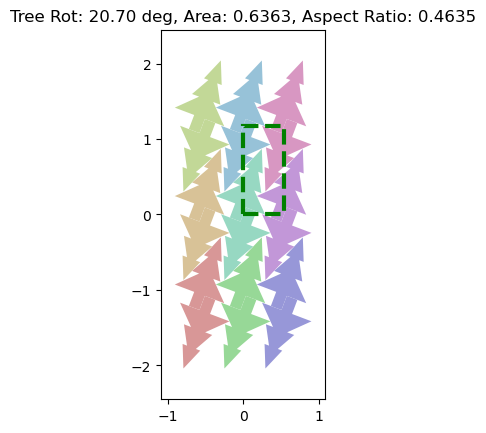

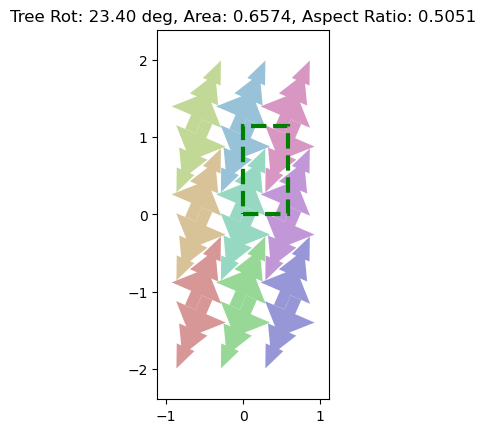

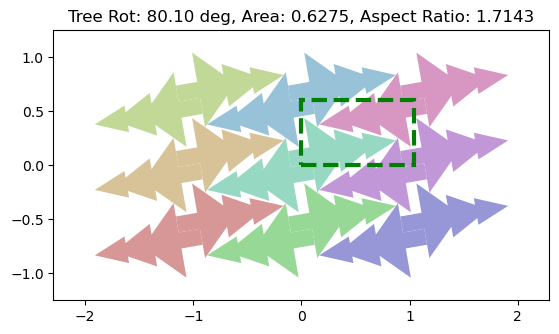

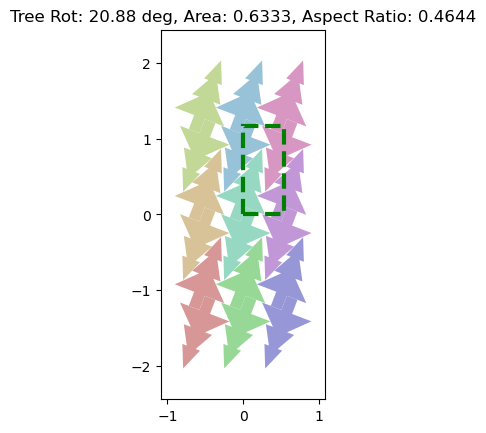

In [9]:
importlib.reload(pack_dimer)
dimer = pack_dimer.create_dimer()
sol_base = kgs.SolutionCollectionLattice(xyt=dimer[None], h=cp.array([[3.,3.,np.pi/2]], dtype=kgs.dtype_cp))
rot_tree_vals3 = np.append(rads_min,np.arctan(0.125/0.3)-0.0303)
rot_cell_vals3 = [np.pi/2]
best_trees_list = []
for i, rot_tree in enumerate(rot_tree_vals3):
    for j, rot_cell in enumerate(rot_cell_vals3):
        sol = copy.deepcopy(sol_base)
        sol.rotate(rot_tree)
        sol.h[0,2] = rot_cell        
        pack_dimer.snap_cell(sol, skip_assert=False)
        area = sol.compute_cost_single_ref(sol.h[0])[0].get()
        aspect_ratio = sol.h[0,0]/(sol.h[0,1]*np.sin(sol.h[0,2]))
        pack_vis_sol.pack_vis_sol(sol, solution_idx=0)
        plt.title(f"Tree Rot: {np.degrees(rot_tree):.2f} deg, Area: {area:.4f}, Aspect Ratio: {aspect_ratio:.4f}")
        best_trees_list.append(pack_dimer.try_tilings(sol))

In [17]:
import pack_io
importlib.reload(pack_io)
import pandas as pd
[sol_list_ref, scores] = pack_io.dataframe_to_solution_list(pd.read_csv(kgs.temp_dir + '71.97.csv'))
#for s in sol_list_ref:
#    s.rotate(-np.pi/2)

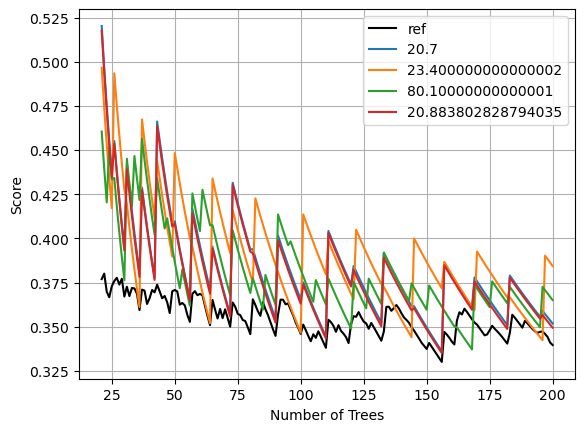

In [11]:
plt.figure()
N_trees = np.arange(1,201)
N=20
lines = []
vals_res = np.array([np.inf]*200)
line = plt.plot(N_trees[N:], scores[N:], 'k')
lines.extend(line)
for b in best_trees_list:
    this_vals = b[0]**2/N_trees
    vals_res = np.minimum(vals_res, this_vals)
    line = plt.plot(N_trees[N:], this_vals[N:])
    lines.extend(line)
plt.grid(True)
plt.legend(['ref']+[str(x) for x in np.degrees(rot_tree_vals3)])
plt.xlabel('Number of Trees')
plt.ylabel('Score')

# Add interactive cursor for all lines
mplcursors.cursor(lines, hover=True)

In [12]:
overall_best = []
for i_tree in range(200):
    best_id = np.argmin([b[0][i_tree] for b in best_trees_list])
    best_sol = best_trees_list[best_id][1][i_tree]
    overall_best.append(best_sol)

In [13]:
import pack_io
import boolean_line_search
import pack_metric
importlib.reload(boolean_line_search)
importlib.reload(pack_io)
importlib.reload(pack_metric)
#x=pack_io.solution_list_to_dataframe(overall_best)
#x
#x.to_csv(kgs.temp_dir + 'submission.csv', index=False)

<module 'pack_metric' from '/mnt/d/packing/code/analysis/../core/pack_metric.py'>

Text(0.5, 1.0, '0.35278572190135293')

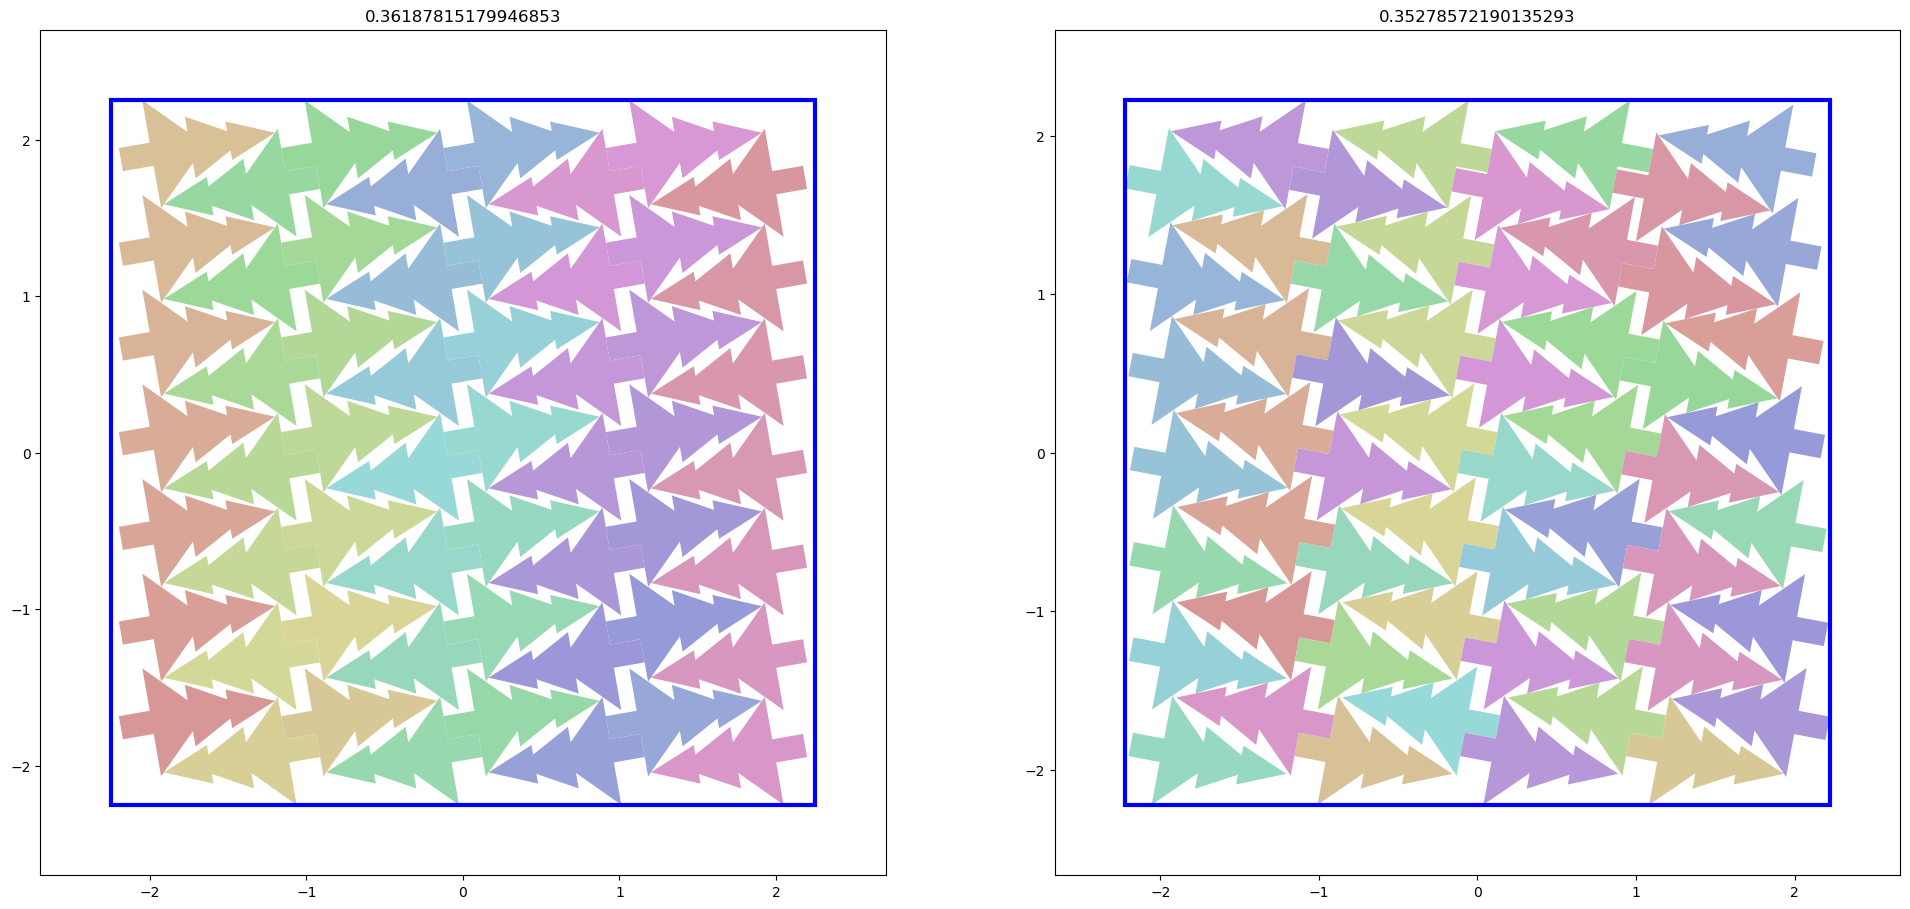

In [ ]:
for N in range(200):
    _,ax = plt.subplots(1,2,figsize=(24,12))
    pack_vis_sol.pack_vis_sol(overall_best[N-1], solution_idx=0, ax=ax[0])
    plt.sca(ax[0])
    plt.title(overall_best[N-1].h[0,0]**2/overall_best[N-1].N_trees)
    pack_vis_sol.pack_vis_sol(sol_list_ref[N-1], solution_idx=0, ax=ax[1])
    plt.sca(ax[1])
    plt.title(sol_list_ref[N-1].h[0,0]**2/overall_best[N-1].N_trees)

local
stop final relax at some point
local
False


GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

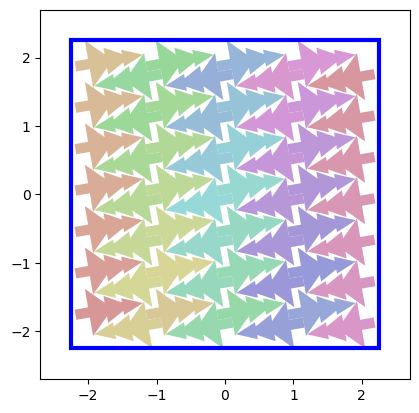

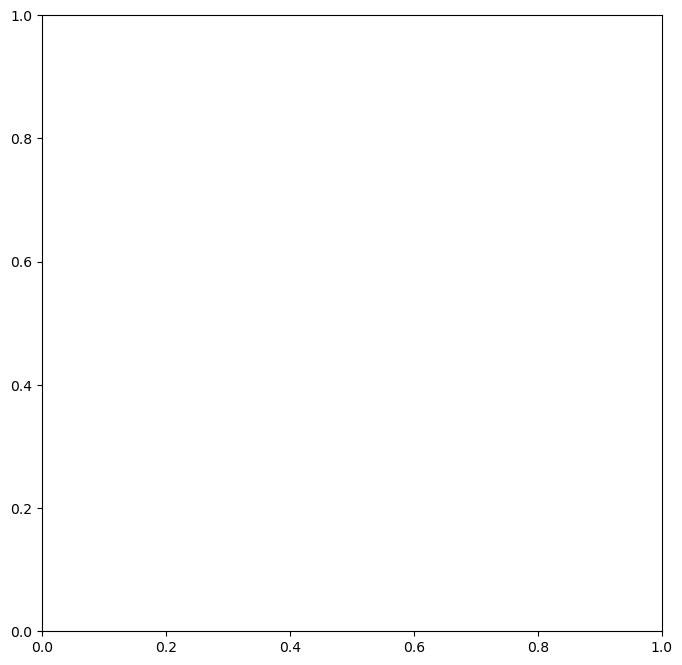

In [35]:
import pack_ga
import pack_cuda
import pack_dynamics
importlib.reload(kgs)
importlib.reload(pack_cuda)
importlib.reload(pack_ga)
importlib.reload(pack_dynamics)
kgs.debugging_mode = 2
kgs.set_float32(True)
print(pack_cuda._initialized)
relaxer = pack_ga.GA().fine_relaxers[0]
relaxer.plot_interval = 0.00001
sol = copy.deepcopy(overall_best[N-1])
xyt = sol.xyt.astype(kgs.dtype_cp)
h = sol.h.astype(kgs.dtype_cp)
sol = kgs.SolutionCollectionSquare(xyt=xyt, h=h)
pack_vis_sol.pack_vis_sol(sol, solution_idx=0)
sol = relaxer.run_simulation(sol)
pack_vis_sol.pack_vis_sol(sol, solution_idx=0)
sol.snap()
plt.title(sol.h[0,0]**2/sol.N_trees)


Text(0.5, 1.0, '0.35203853')

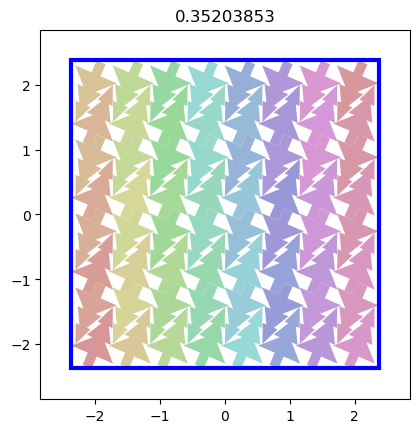

In [20]:
pack_vis_sol.pack_vis_sol(sol, solution_idx=0)
sol.snap()
plt.title(sol.h[0,0]**2/sol.N_trees)

In [27]:
kgs.dtype_cp

numpy.float32